In [163]:
%pylab inline
from datetime import date
from datetime import datetime
import os
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import (mean_squared_error, r2_score)
from sklearn.model_selection import GridSearchCV
from scipy.stats import ks_2samp

Populating the interactive namespace from numpy and matplotlib


/home/juanchosol1996/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['e', 'test', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [164]:
n1 = np.array([(70,8),(90,10),(100,7)])
n2 = np.array([(50,10),(90,10),(100,10)])
arqs ={"adam": n1,
      "lbfgs":n2
}

n1_10 = np.array([(60,10),(90,7),(100,10)])
n2_10 = np.array([(70,8),(90,10),(100,10)])
arqs10 ={"adam": n1_10,
        "lbfgs":n2_10
}

In [ ]:
#Funciones para crear matrices de entrenaminto y pruebas

In [165]:
def train_X_Y(dia, deltas,dollar, d_inicial,num_samples,num_features):    ##d_inicial : 0 a 2508
    ##dias: vector de dia de la semana para cada dia (L=1...V=5)
    ##precios: vector de pecios para cada dia
    ##d_inicial: Primer dia del entrenamiento (0 a 2508) es num_features-1 dias antes que el primer Y de entrenamiento 
    ##num_samples: Número de muestras para entrenar 
    ##num_features: Número de parametros de entrenamiento (1+ número de dias con que se predice el precio)
    
    
    
    num_dias = num_features-2
   
    dias = dia[d_inicial+num_dias:d_inicial+num_dias+num_samples]
    dias = dias.reshape(len(dias),1)
    dolar = dollar[d_inicial+num_dias-1:d_inicial+num_dias+num_samples-1]
    dolar = dolar.reshape(len(dolar),1)
    
    
    d=deltas[d_inicial:d_inicial+num_samples]
    
    for i in range(d_inicial+1,d_inicial+num_dias):
        m = deltas[i:i+num_samples]
        d =  np.column_stack((d,m))       
    d = np.column_stack((d,dias))
    X = np.column_stack((d,dolar))
             
    Y = deltas[d_inicial+num_dias:d_inicial+num_dias+num_samples]
    
    assert (X.shape == (num_samples, num_features))
    assert (Y.shape == (num_samples,))
    
    train = {"X": X,
             "Y": Y
            }
    
    return train



def test_X_Y(dias, deltas,dolar, d_inicial,num_samples,num_features):
    test = train_X_Y(dias, deltas,dolar, d_inicial,num_samples,num_features)
    
    return test

def cal_porcentaje(porcentajes):
    prcts=[]
    acum = porcentajes[0]
    prcts.append(acum)
    for i in range(1,len(porcentajes)):
        acum = acum*porcentajes[i]
        prcts.append(acum)
    
    prcts = np.array(prcts)
    return prcts


def errores(Y_expected,Y_predict):
    error_RMS= sqrt(mean_squared_error(Y_expected,Y_predict))
    error_MBE= mean(Y_expected-Y_predict)
    p_value = ks_2samp(Y_expected,Y_predict)[1]
    r2 = r2_score(Y_expected,Y_predict)
    
    error_RMS= np.round(error_RMS,3)
    error_MBE= np.round(error_MBE,4)
    p_value = np.round(p_value,2)
    r2 = np.round(r2,2)
                    
                    
    error = {"RMS": error_RMS,
             "MBE": error_MBE,
             "P-Value": p_value,
             "R2":r2
            }
    return error


def RMS(Y_prdct,Y):
    error = np.sqrt(sum((Y_prdct-Y)**2))/len(Y)
    return error

def graph_comb(values):
    k= np.array(values)
    sw = True

    while sw == True:
        sw = False
        for i in range(len(k)-1):
            temp1 = list(k[i])
            temp2 = list(k[i+1])
            if temp2[0]<temp1[0]:
                k[i]=temp2
                k[i+1]=temp1
                sw=True

            if temp2[0]==temp1[0]:
                if temp2[1]<temp1[1]:
                    k[i]=temp2
                    k[i+1]=temp1
                    sw=True
    a=[]
    b=[]
    i=0
    while i in range (len(k)):
        d = k[i]
        a.append(d)
        cnt=1
        l = k[i+1:]
        for j in range(len(l)):
            if sum(l[j]==d)==2:
                cnt= cnt+1
            else:
                j= len(l)
        b.append(cnt)
        i= i+cnt
    
    plt.bar(range(len(a)),b)
    plt.plot()
    plt.subplots_adjust(left=0.5, bottom=1, right=3, top=2)
    plt.show()
    print(a)
    print(b)

In [ ]:
## Poblando datos

In [166]:
datos_csv = os.path.join( '.','COLCAP.csv')
datos_pd = pd.read_csv(datos_csv, sep = ',',
                encoding='latin-1', parse_dates =[0], infer_datetime_format= True)
dolar_csv = os.path.join( '.','Dolar.csv')
dolar_pd = pd.read_csv(dolar_csv, sep = ',',
                encoding='latin-1', parse_dates =[0], infer_datetime_format= True)

In [167]:
fecha_o = datos_pd['Fecha (dd/mm/aaaa)']
fecha = dolar_pd['Fecha (dd/mm/aaaa)']
variacion = dolar_pd['Variación Porcentual']

var_dolar =[]
for i in range(len(fecha)):
    if sum(fecha[i] == fecha_o) == 1:
        var_dolar.append(variacion[i])
        
var_dolar = np.array(var_dolar)

In [168]:
a=datos_pd["Fecha (dd/mm/aaaa)"]

days = []

for i in range(len(a)):
    d = a[i].weekday() + 1
    days.append(d)
    
d = np.array(days)

In [169]:
c = datos_pd["Valor COLCAP"]
c = np.array(c)
for i in range(len(c)):
    c[i] = c[i].replace(',',"")


price=np.array(c, dtype= np.float64)

In [170]:
b = datos_pd["Variación porcentual"]
b = np.array(b)
for i in range(len(b)):
    b[i] = b[i].replace('%',"")


p=np.array(b, dtype= np.float64)

In [ ]:
## Prueba

In [220]:
#Definición de matrices de entreno
train=train_X_Y(d,p,var_dolar,1202,1000,12)

In [221]:
#Definición de matrices de prueba
test=test_X_Y(d,p,var_dolar,2509-30-10,30,12)

In [272]:
#Entreno del sistema
e = 10000
rg = None
for l in range(20):
    with warnings.catch_warnings(record=True) as w:
        warnings.simplefilter("always") 
        r = MLPRegressor(hidden_layer_sizes=arqs10["lbfgs"][2], max_iter= 200, activation="relu",shuffle= False, solver= "lbfgs", warm_start= False, tol=0.000001)
        r.fit(train["X"],train["Y"])
    error = errores(train['Y'],r.predict(train['X']))['RMS']
    
    if error<e:
        e=error
        rg=r
        print(e)
        

0.815
0.811
0.776


In [273]:
print(rg.n_iter_)
print(e)
print(rg.solver)
print(rg.hidden_layer_sizes)

201
0.776
lbfgs
[100  10]


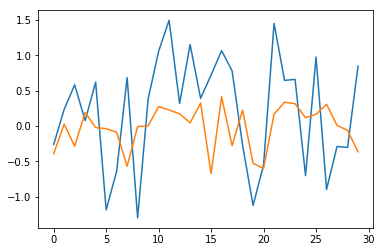

El Error RMS del entreno es: 0.776
El Error MBE del entreno es: -0.0127
El P-Value del entreno es: 0.0

El Error RMS de la prueba es: 0.816
El Error MBE de la prueba es: 0.2394
El P-Value de la prueba es: 0.0


In [274]:
#Grafica de predicción y real
y1 = np.array(test["Y"])
y2= np.array(rg.predict(test["X"]))
plt.plot(y1)
plt.plot(y2)
error_train = errores(train['Y'],rg.predict(train['X']))
error_test = errores(test['Y'],rg.predict(test['X']))

plt.show()

print("El Error RMS del entreno es: " + str(error_train['RMS']))
print("El Error MBE del entreno es: " + str(error_train['MBE']))
print("El P-Value del entreno es: " + str(error_train['P-Value']))
print('')
print("El Error RMS de la prueba es: " + str(error_test['RMS']))
print("El Error MBE de la prueba es: " + str(error_test['MBE']))
print("El P-Value de la prueba es: " + str(error_test['P-Value']))

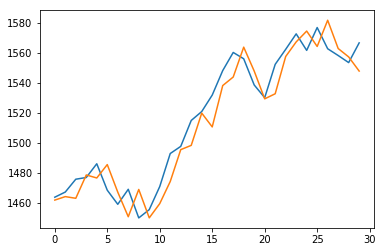

El Error RMS de la prueba es: 12.337
El Error MBE de la prueba es: 3.5644
El P-Value de la prueba es: 0.94
El R^2 de la prueba es: 0.91


In [275]:
y_1=price[2509-30:2509]
preprice =price[2509-1-30:2509-1]
plt.plot(y_1[-30:])
prct = rg.predict(test["X"])/100+1
#prct = test["Y"]/100+1
#prct = cal_porcentaje(prct)

y_2 = preprice*prct
plt.plot(y_2)
plt.show()

error = errores(y_1,y_2)
print("El Error RMS de la prueba es: " + str(error['RMS']))
print("El Error MBE de la prueba es: " + str(error['MBE']))
print("El P-Value de la prueba es: " + str(error['P-Value']))
print("El R^2 de la prueba es: " + str(error['R2']))

In [ ]:
ant = np.array(p[-15:-6])
dia= d[-5]
X_predict = np. append(ant[0:],dia)
dol = var_dolar[-6]
X_predict = np. append(X_predict,dol)
X_predict = X_predict.reshape(1,11)

Y = rg.predict(X_predict)
ant=np.append(ant,Y)

for i in range(10):
    dia = dia+1
    if dia==6:
        dia=1
    
    v = np.append(ant[i+1:],dia)
    dol =var_dolar[-6+i]
    v = np.append(v,dol)
    v =v.reshape(1,11)
    X_predict= np.vstack((X_predict,v))
    Y = rg.predict(v)
    ant=np.append(ant,Y)
    
Y = rg.predict(X_predict)
prct =cal_porcentaje(Y/100+1)

plt.plot(price[-6]*prct)
plt.plot(price[-5:])

In [69]:
#Entreno del sistema lbfgs
e = 10
rg = None
for l in range(10):
    with warnings.catch_warnings(record=True) as w:
        warnings.simplefilter("always") 
        r = MLPRegressor(hidden_layer_sizes=(100,3), max_iter= 200, activation="relu",shuffle= False, solver= "lbfgs", warm_start= False, tol=0.000001)
        r.fit(train["X"],train["Y"])
    error = errores(train['Y'],r.predict(train['X']))['RMS']
    
    if error<e:
        e=error
        rg=r
        print(e)
        

3.152
0.911
0.908
0.88
0.876


In [70]:
print(rg.n_iter_)
print(e)

201
0.876


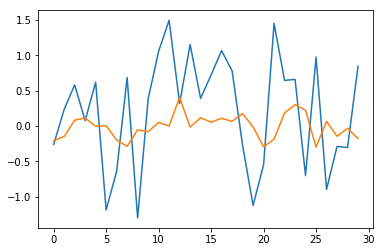

El Error RMS del entreno es: 0.876
El Error MBE del entreno es: -0.0054
El P-Value del entreno es: 0.0

El Error RMS de la prueba es: 0.83
El Error MBE de la prueba es: 0.2263
El P-Value de la prueba es: 0.0


In [71]:
#Grafica de predicción y real
y1 = np.array(test["Y"])
y2= np.array(rg.predict(test["X"]))
plt.plot(y1)
plt.plot(y2)
error_train = errores(train['Y'],rg.predict(train['X']))
error_test = errores(test['Y'],rg.predict(test['X']))

plt.show()

print("El Error RMS del entreno es: " + str(error_train['RMS']))
print("El Error MBE del entreno es: " + str(error_train['MBE']))
print("El P-Value del entreno es: " + str(error_train['P-Value']))
print('')
print("El Error RMS de la prueba es: " + str(error_test['RMS']))
print("El Error MBE de la prueba es: " + str(error_test['MBE']))
print("El P-Value de la prueba es: " + str(error_test['P-Value']))

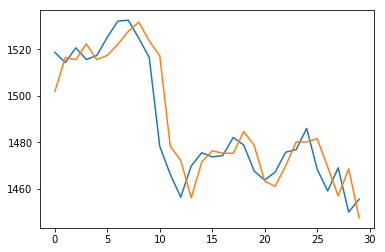

El Error RMS de la prueba es: 0.83
El Error MBE de la prueba es: 0.2263
El P-Value de la prueba es: 0.0


In [72]:
y_1=price[2450+9:2450+30+9]
preprice =price[2450+9-1:2450+30+9-1]
plt.plot(y_1[-30:])
prct = rg.predict(test["X"])/100+1
#prct = test["Y"]/100+1
#prct = cal_porcentaje(prct)

y_2 = preprice*prct
plt.plot(y_2[-30:])
plt.show()

error = errores(y1,y2)
print("El Error RMS de la prueba es: " + str(error['RMS']))
print("El Error MBE de la prueba es: " + str(error['MBE']))
print("El P-Value de la prueba es: " + str(error['P-Value']))

In [ ]:
#Prueba del modelo
rg.score(train["X"], train["Y"])

In [ ]:
rg.score(test["X"], test["Y"])

[(30, 1)]
[(30, 1), (70, 1)]
[(30, 1), (70, 1), (30, 2)]
[(30, 1), (70, 1), (30, 2), (90, 1)]
[(30, 1), (70, 1), (30, 2), (90, 1), (50, 3)]
[(30, 1), (70, 1), (30, 2), (90, 1), (50, 3), (30, 1)]
[(30, 1), (70, 1), (30, 2), (90, 1), (50, 3), (30, 1), (40, 1)]
[(30, 1), (70, 1), (30, 2), (90, 1), (50, 3), (30, 1), (40, 1), (100, 1)]
[(30, 1), (70, 1), (30, 2), (90, 1), (50, 3), (30, 1), (40, 1), (100, 1), (50, 1)]
[(30, 1), (70, 1), (30, 2), (90, 1), (50, 3), (30, 1), (40, 1), (100, 1), (50, 1), (40, 1)]
[(30, 1), (70, 1), (30, 2), (90, 1), (50, 3), (30, 1), (40, 1), (100, 1), (50, 1), (40, 1), (60, 1)]
[(30, 1), (70, 1), (30, 2), (90, 1), (50, 3), (30, 1), (40, 1), (100, 1), (50, 1), (40, 1), (60, 1), (20, 1)]
[(30, 1), (70, 1), (30, 2), (90, 1), (50, 3), (30, 1), (40, 1), (100, 1), (50, 1), (40, 1), (60, 1), (20, 1), (60, 1)]
[(30, 1), (70, 1), (30, 2), (90, 1), (50, 3), (30, 1), (40, 1), (100, 1), (50, 1), (40, 1), (60, 1), (20, 1), (60, 1), (100, 1)]
[(30, 1), (70, 1), (30, 2), (90, 

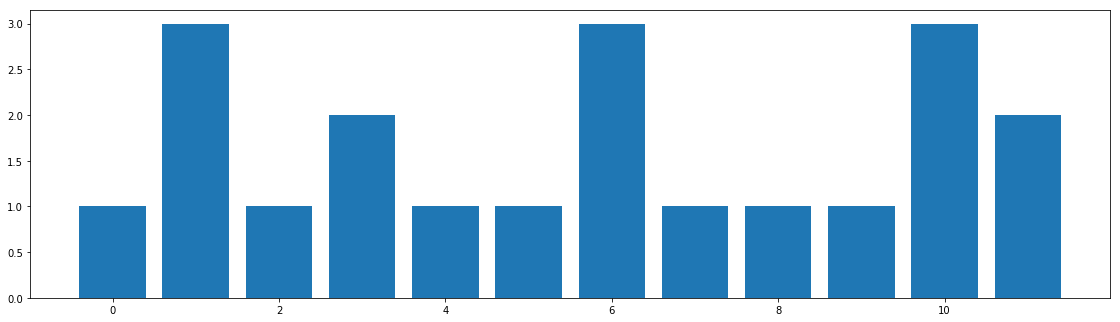

[array([20,  1]), array([30,  1]), array([30,  2]), array([40,  1]), array([50,  1]), array([50,  3]), array([60,  1]), array([60,  3]), array([70,  1]), array([80,  2]), array([90,  1]), array([100,   1])]
[1, 3, 1, 2, 1, 1, 3, 1, 1, 1, 3, 2]


In [15]:
#Adam
c= []
a=[]
for i in range (10,110,10):
    for j in range (1,11):
        a.append((i,j))

parameters = {'hidden_layer_sizes':a}
r = MLPRegressor(solver='adam', tol=0.000001)
clf = GridSearchCV(r, parameters,scoring= 'neg_mean_squared_error', return_train_score= 'False')

for i in range(20):
    
    with warnings.catch_warnings(record=True) as w:
            warnings.simplefilter("always")
            clf.fit(train['X'], train['Y'])
        
    c.append(clf.best_params_['hidden_layer_sizes'])
    
    print(c)
    
n = c
graph_comb(n)

[(70, 1)]
[(70, 1), (100, 1)]
[(70, 1), (100, 1), (50, 1)]
[(70, 1), (100, 1), (50, 1), (80, 1)]
[(70, 1), (100, 1), (50, 1), (80, 1), (100, 1)]
[(70, 1), (100, 1), (50, 1), (80, 1), (100, 1), (100, 1)]
[(70, 1), (100, 1), (50, 1), (80, 1), (100, 1), (100, 1), (50, 1)]
[(70, 1), (100, 1), (50, 1), (80, 1), (100, 1), (100, 1), (50, 1), (60, 1)]
[(70, 1), (100, 1), (50, 1), (80, 1), (100, 1), (100, 1), (50, 1), (60, 1), (20, 1)]
[(70, 1), (100, 1), (50, 1), (80, 1), (100, 1), (100, 1), (50, 1), (60, 1), (20, 1), (90, 1)]
[(70, 1), (100, 1), (50, 1), (80, 1), (100, 1), (100, 1), (50, 1), (60, 1), (20, 1), (90, 1), (40, 1)]
[(70, 1), (100, 1), (50, 1), (80, 1), (100, 1), (100, 1), (50, 1), (60, 1), (20, 1), (90, 1), (40, 1), (60, 2)]
[(70, 1), (100, 1), (50, 1), (80, 1), (100, 1), (100, 1), (50, 1), (60, 1), (20, 1), (90, 1), (40, 1), (60, 2), (70, 1)]
[(70, 1), (100, 1), (50, 1), (80, 1), (100, 1), (100, 1), (50, 1), (60, 1), (20, 1), (90, 1), (40, 1), (60, 2), (70, 1), (80, 1)]
[(70, 1),

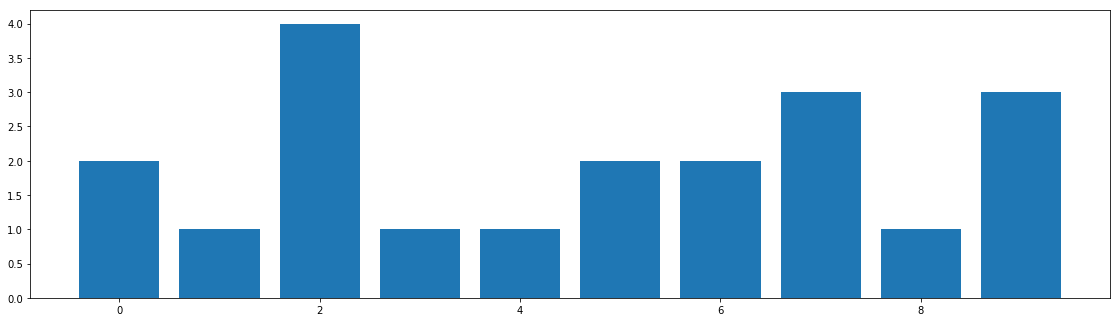

[array([20,  1]), array([40,  1]), array([50,  1]), array([50,  2]), array([60,  1]), array([60,  2]), array([70,  1]), array([80,  1]), array([90,  1]), array([100,   1])]
[2, 1, 4, 1, 1, 2, 2, 3, 1, 3]


In [26]:
# LBFGS
c= []
a=[]
for i in range (10,110,10):
    for j in range (1,11):
        a.append((i,j))

parameters = {'hidden_layer_sizes':a}
r = MLPRegressor(solver='lbfgs', tol=0.000001)
clf = GridSearchCV(r, parameters,scoring= 'neg_mean_squared_error', return_train_score= 'False')

for i in range(20):
    
    with warnings.catch_warnings(record=True) as w:
            warnings.simplefilter("always")
            clf.fit(train['X'], train['Y'])
        
    c.append(clf.best_params_['hidden_layer_sizes'])
    
    print(c)
n = c
graph_comb(n)

(90, 10)
0.967
(60, 6)
0.905
(50, 10)
3.012
(70, 3)
1.436
(50, 6)
2.376
(100, 5)
0.893
(70, 8)
2.009
(100, 4)
3.096
(80, 6)
0.88
(80, 9)
3.268
(80, 8)
2.946
(60, 10)
2.961
(100, 6)
3.118
(60, 3)
2.787
(80, 10)
0.858
(100, 10)
0.852
(60, 8)
3.272
(80, 7)
0.908
(50, 7)
1.48
(50, 10)
0.886
[(90, 10), (60, 6), (50, 10), (70, 3), (50, 6), (100, 5), (70, 8), (100, 4), (80, 6), (80, 9), (80, 8), (60, 10), (100, 6), (60, 3), (80, 10), (100, 10), (60, 8), (80, 7), (50, 7), (50, 10)]


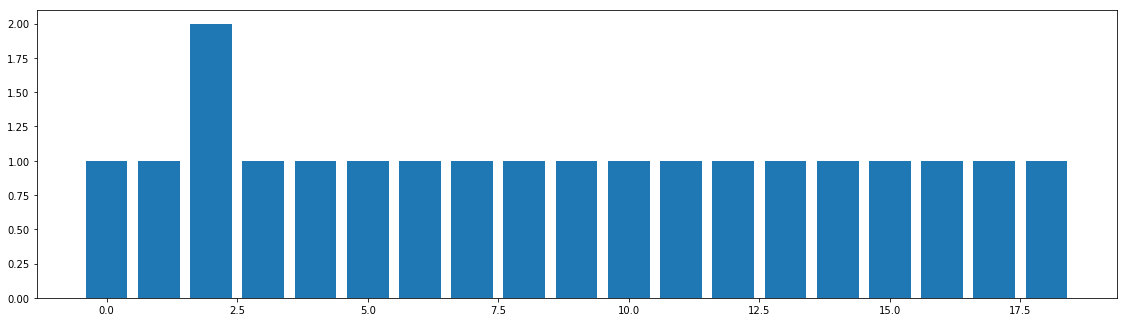

[array([50,  6]), array([50,  7]), array([50, 10]), array([60,  3]), array([60,  6]), array([60,  8]), array([60, 10]), array([70,  3]), array([70,  8]), array([80,  6]), array([80,  7]), array([80,  8]), array([80,  9]), array([80, 10]), array([90, 10]), array([100,   4]), array([100,   5]), array([100,   6]), array([100,  10])]
[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [161]:
# Mejor combinación lbfgs
c= []
conf = np.array([])
rep = np.array([])
for k in range(20):
    menor = 1000
    m=""
    error =1000
    for i in range (50,110,10):
        for j in range (1,11):

            with warnings.catch_warnings(record=True) as w:
                warnings.simplefilter("always") 
                rg = MLPRegressor(hidden_layer_sizes=(i,j), max_iter= 200, activation="relu",shuffle= False, solver= "lbfgs",tol=0.000001)
                rg.fit(train["X"],train["Y"])

            if w==[]:
                error = errores(train["Y"],rg.predict(train["X"]))["RMS"]

            if error<menor:
                menor = error
                m = (i,j) 
                
    print(m)
    print(error)
    c.append(m)

print(c)
n = c
graph_comb(n)

(60, 8)
3.085
(100, 6)
3.211
(90, 9)
3.191
(80, 10)
3.194
(90, 7)
3.027
(80, 8)
3.109
(100, 9)
3.027
(60, 7)
3.164
(90, 10)
3.207
(100, 7)
3.198
(90, 5)
3.135
(70, 7)
3.2
(80, 10)
3.066
(100, 9)
3.177
(100, 7)
3.154
(60, 10)
3.154
(100, 7)
3.143
(100, 6)
3.182
(90, 5)
3.153
(90, 9)
3.103
[(60, 8), (100, 6), (90, 9), (80, 10), (90, 7), (80, 8), (100, 9), (60, 7), (90, 10), (100, 7), (90, 5), (70, 7), (80, 10), (100, 9), (100, 7), (60, 10), (100, 7), (100, 6), (90, 5), (90, 9)]


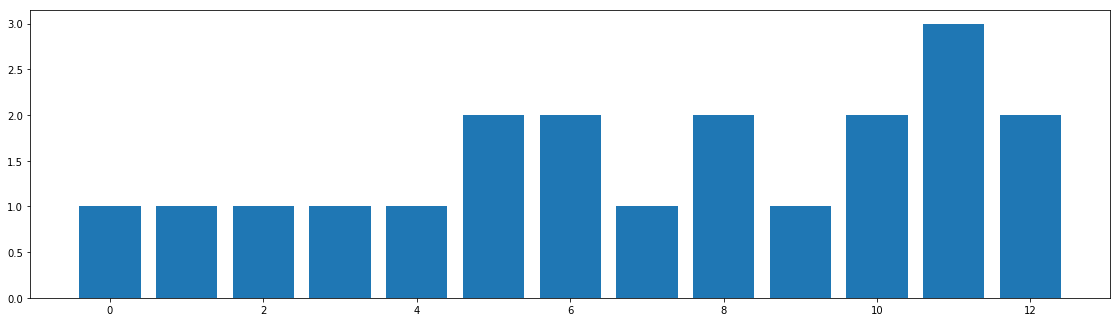

[array([60,  7]), array([60,  8]), array([60, 10]), array([70,  7]), array([80,  8]), array([80, 10]), array([90,  5]), array([90,  7]), array([90,  9]), array([90, 10]), array([100,   6]), array([100,   7]), array([100,   9])]
[1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 3, 2]


In [157]:
# Mejor combinación Adam
c= []
conf = np.array([])
rep = np.array([])
for k in range(20):
    menor = 1000
    m=""
    error =1000
    for i in range (50,110,10):
        for j in range (1,11):

            with warnings.catch_warnings(record=True) as w:
                warnings.simplefilter("always") 
                rg = MLPRegressor(hidden_layer_sizes=(i,j), max_iter= 200, activation="relu",shuffle= False, solver= "adam",tol=0.000001)
                rg.fit(train["X"],train["Y"])

            if w==[]:
                error = errores(train["Y"],rg.predict(train["X"]))["RMS"]

            if error<menor:
                menor = error
                m = (i,j) 
                
    print(m)
    print(error)
    c.append(m)

print(c)
n = c
graph_comb(n)